In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import IntProgress
import time
plt.style.use("dark_background")

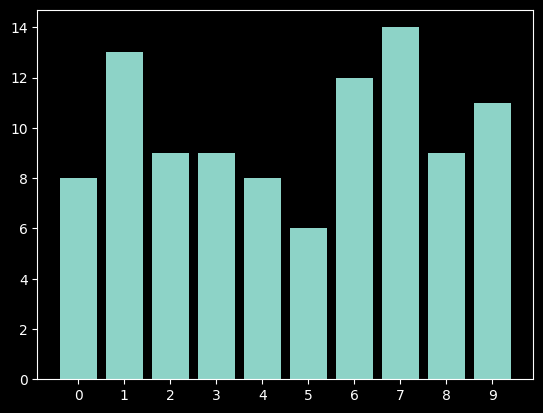

In [67]:
"""
Trying out a sample code
"""


# The length of the string of numbers:
length = 1000
string_of_numbers = np.random.randint(low=0, high=10, size=length)
# Finding and counting the occurrence of all the numbers after the number 4:
unique, counts = np.unique(string_of_numbers[np.where(string_of_numbers==4)[0] - 1], return_counts=True)
plt.bar(unique, counts)
plt.xticks(range(10));

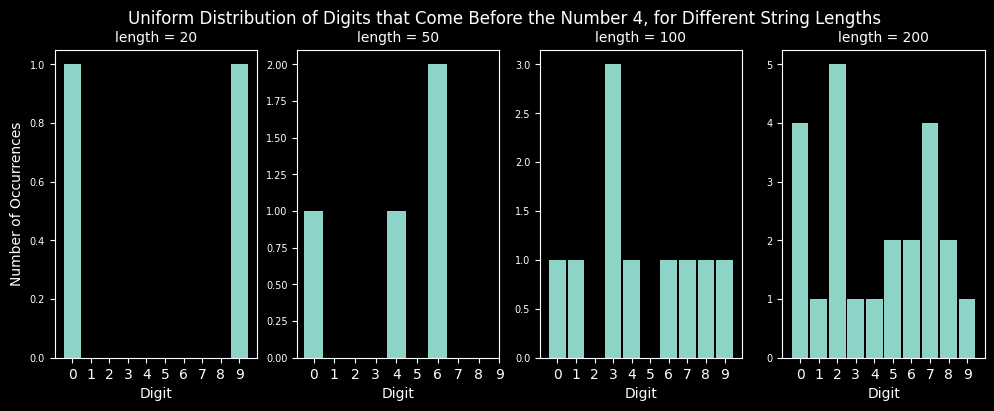

In [71]:
"""
Generalizing the code for different lengths and plotting them all together:
"""


# The different lengths:
lengths = np.array([20, 50, 100, 200])
# Plotting variables (adjusted for 4 lengths):
fig, ax = plt.subplots(1, len(lengths), figsize=(12,4))


for i in range(len(lengths)):
    length = lengths[i]
    string_of_numbers = np.random.randint(low=0, high=10, size=length, dtype=int)
    unique, counts = np.unique(string_of_numbers[np.where(string_of_numbers==4)[0] - 1], return_counts=True)
    # Putting the generated data into the subplots:
    fig.suptitle("Uniform Distribution of Digits that Come Before the Number 4, for Different String Lengths")
    ax[i].bar(unique, counts, width=0.9)
    ax[i].set_xticks(range(10))
    ax[i].tick_params(axis="y", which="major", labelsize=7)
    ax[i].set_title(f"length = {lengths[i]}", fontsize=10)
    ax[i].set_xlabel("Digit")


ax[0].set_ylabel("Number of Occurrences");

In [72]:
# fig.savefig("Exercise6_2_1.jpg")

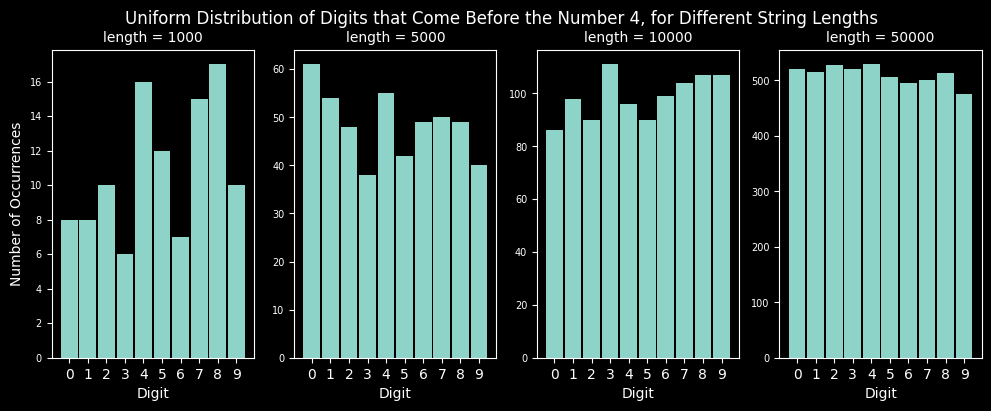

In [73]:
"""
Generalizing the code for different lengths and plotting them all together:
"""


# The different lengths:
lengths = np.array([1000, 5000, 10_000, 50_000])
# Plotting variables (adjusted for 4 lengths):
fig, ax = plt.subplots(1, len(lengths), figsize=(12,4))


for i in range(len(lengths)):
    length = lengths[i]
    string_of_numbers = np.random.randint(low=0, high=10, size=length, dtype=int)
    unique, counts = np.unique(string_of_numbers[np.where(string_of_numbers==4)[0] - 1], return_counts=True)
    # Putting the generated data into the subplots:
    fig.suptitle("Uniform Distribution of Digits that Come Before the Number 4, for Different String Lengths")
    ax[i].bar(unique, counts, width=0.9)
    ax[i].set_xticks(range(10))
    ax[i].tick_params(axis="y", which="major", labelsize=7)
    ax[i].set_title(f"length = {lengths[i]}", fontsize=10)
    ax[i].set_xlabel("Digit")


ax[0].set_ylabel("Number of Occurrences");

In [74]:
# fig.savefig("Exercise6_2_2.jpg")

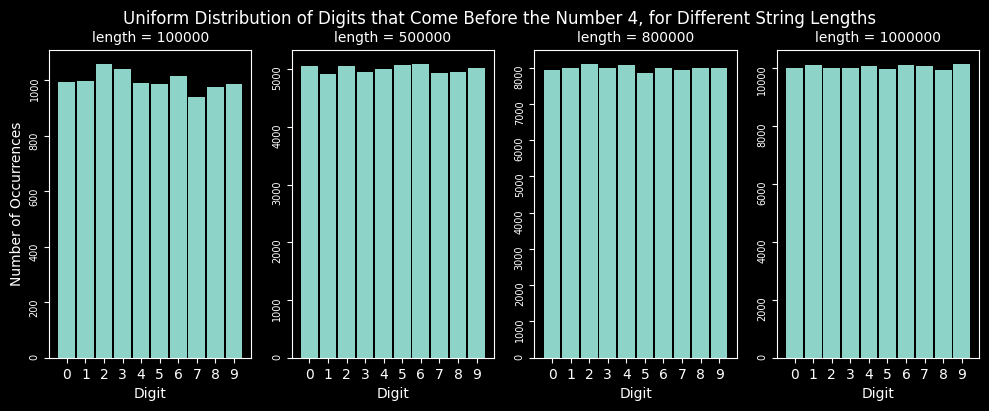

In [77]:
"""
Generalizing the code for different lengths and plotting them all together:
"""


# The different lengths:
lengths = np.array([100_000, 500_000, 800_000, 1_000_000])
# Plotting variables (adjusted for 4 lengths):
fig, ax = plt.subplots(1, len(lengths), figsize=(12,4))


for i in range(len(lengths)):
    length = lengths[i]
    string_of_numbers = np.random.randint(low=0, high=10, size=length, dtype=int)
    unique, counts = np.unique(string_of_numbers[np.where(string_of_numbers==4)[0] - 1], return_counts=True)
    # Putting the generated data into the subplots:
    fig.suptitle("Uniform Distribution of Digits that Come Before the Number 4, for Different String Lengths")
    ax[i].bar(unique, counts, width=0.9)
    ax[i].set_xticks(range(10))
    ax[i].tick_params(axis="y", which="major", labelsize=7, rotation=90)
    ax[i].set_title(f"length = {lengths[i]}", fontsize=10)
    ax[i].set_xlabel("Digit")


ax[0].set_ylabel("Number of Occurrences");

In [78]:
# fig.savefig("Exercise6_2_3.jpg")

$\Large Checking \ the \ Relation \ \log(\sigma) \sim \frac12\log(N)$

In [118]:
# The length of the string of numbers:
length = 100_000
# The number of times we run the program. It is used to find the statistical error of the result.
ensemble_size = 100
# "snapshots" start and step:
start = 1000
step = 1000
# As the variable "data" is changed in each iteration of the for loop,
# we take snapshots of it and calculate its standard deviation in these iterations:
snapshots = np.arange(start=start, stop=length, step=step)

sigmas = np.zeros((ensemble_size, len(snapshots)))
# Each row of this matrix is a string of numbers. In each iteration, one of the rows is selected,
# then different lengths of that row is selected (to simulate the growing of the string).
# For each length, the number of occurrences of each digit is found,
# and then the standard deviation of the occurrences is calculated and put in "sigmas".
matrix_of_strings = np.random.randint(low=0, high=10, size=(ensemble_size, length))

for i in range(ensemble_size):
    string_of_numbers = matrix_of_strings[i]
    for n in range(len(snapshots)):
        unique, counts = np.unique(string_of_numbers[0:snapshots[n]][np.where(string_of_numbers[0:snapshots[n]]==4)[0] - 1], return_counts=True)
        sigmas[i,n] = np.std(counts)

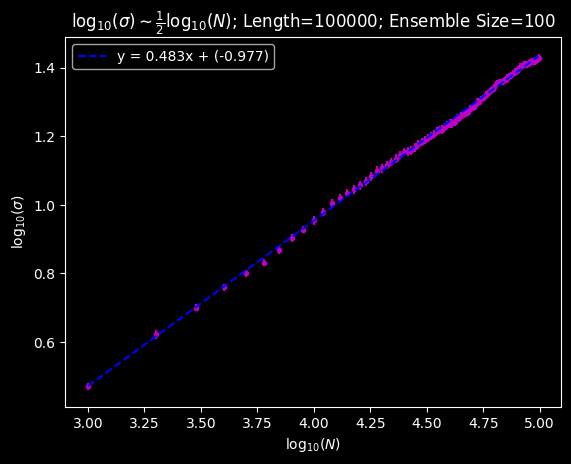

In [120]:
# Preparing data for plotting:
xs = np.log10(snapshots)
ys = np.log10(np.mean(sigmas, axis=0))
# Preparing a best fit line:
coefs = np.polynomial.polynomial.polyfit(xs, ys, deg=1)
ffit = np.polynomial.polynomial.polyval(xs, coefs)
# Initiating the plot:
fig, ax = plt.subplots()
ax.plot(xs, ffit, "b--", label=f"y = {coefs[1]:.3f}x + ({coefs[0]:.3f})", zorder=2)
ax.set_title(f"$\log_{{10}}(\sigma) \sim \\frac{{1}}{{2}}\log_{{10}}(N)$; Length={length}; Ensemble Size={ensemble_size}")
ax.set_xlabel("$\log_{{10}}(N)$")
ax.set_ylabel("$\log_{{10}}(\sigma)$")
ax.legend();
ax.errorbar(xs, ys,
            yerr=np.std(np.log10(sigmas), axis=0)/np.sqrt(ensemble_size-1),
            fmt=".",
            color="m",
            zorder=1);

In [122]:
# fig.savefig("Exercise6_2_4.jpg")

In [123]:
print(f"The slope is {coefs[1]} +- {np.mean(np.std(np.log10(sigmas), axis=0))}")

The slope is 0.48262015501648664 +- 0.10649857756412737


In [124]:
# This cell takes 20 seconds to execute.
# The length of the string of numbers:
length = 1_000_000
# The number of times we run the program. It is used to find the statistical error of the result.
ensemble_size = 100
# "snapshots" start and step:
start = 10000
step = 10000
# As the variable "data" is changed in each iteration of the for loop,
# we take snapshots of it and calculate its standard deviation in these iterations:
snapshots = np.arange(start=start, stop=length, step=step)

sigmas = np.zeros((ensemble_size, len(snapshots)))
# Each row of this matrix is a string of numbers. In each iteration, one of the rows is selected,
# then different lengths of that row is selected (to simulate the growing of the string).
# For each length, the number of occurrences of each digit is found,
# and then the standard deviation of the occurrences is calculated and put in "sigmas".
matrix_of_strings = np.random.randint(low=0, high=10, size=(ensemble_size, length))

for i in range(ensemble_size):
    string_of_numbers = matrix_of_strings[i]
    for n in range(len(snapshots)):
        unique, counts = np.unique(string_of_numbers[0:snapshots[n]][np.where(string_of_numbers[0:snapshots[n]]==4)[0] - 1], return_counts=True)
        sigmas[i,n] = np.std(counts)

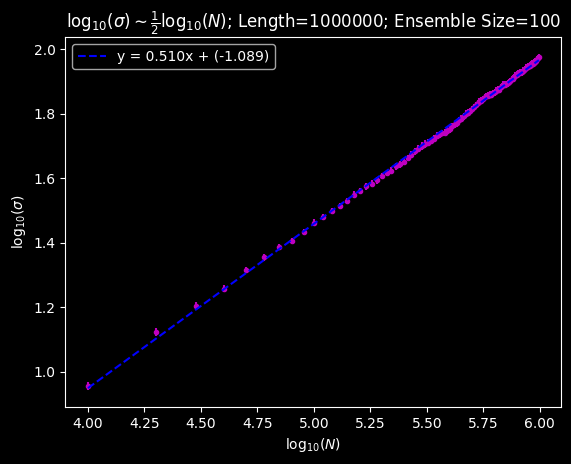

In [125]:
# Preparing data for plotting:
xs = np.log10(snapshots)
ys = np.log10(np.mean(sigmas, axis=0))
# Preparing a best fit line:
coefs = np.polynomial.polynomial.polyfit(xs, ys, deg=1)
ffit = np.polynomial.polynomial.polyval(xs, coefs)
# Initiating the plot:
fig, ax = plt.subplots()
ax.plot(xs, ffit, "b--", label=f"y = {coefs[1]:.3f}x + ({coefs[0]:.3f})", zorder=2)
ax.set_title(f"$\log_{{10}}(\sigma) \sim \\frac{{1}}{{2}}\log_{{10}}(N)$; Length={length}; Ensemble Size={ensemble_size}")
ax.set_xlabel("$\log_{{10}}(N)$")
ax.set_ylabel("$\log_{{10}}(\sigma)$")
ax.legend();
ax.errorbar(xs, ys,
            yerr=np.std(np.log10(sigmas), axis=0)/np.sqrt(ensemble_size-1),
            fmt=".",
            color="m",
            zorder=1);

In [127]:
# fig.savefig("Exercise6_2_5.jpg")

In [128]:
print(f"The slope is {coefs[1]} +- {np.mean(np.std(np.log10(sigmas), axis=0))}")

The slope is 0.5096034146231384 +- 0.1058948479948182


In [129]:
# This cell takes 20 seconds to execute.
# The length of the string of numbers:
length = 100_000
# The number of times we run the program. It is used to find the statistical error of the result.
ensemble_size = 1000
# "snapshots" start and step:
start = 1000
step = 1000
# As the variable "data" is changed in each iteration of the for loop,
# we take snapshots of it and calculate its standard deviation in these iterations:
snapshots = np.arange(start=start, stop=length, step=step)

sigmas = np.zeros((ensemble_size, len(snapshots)))
# Each row of this matrix is a string of numbers. In each iteration, one of the rows is selected,
# then different lengths of that row is selected (to simulate the growing of the string).
# For each length, the number of occurrences of each digit is found,
# and then the standard deviation of the occurrences is calculated and put in "sigmas".
matrix_of_strings = np.random.randint(low=0, high=10, size=(ensemble_size, length))

for i in range(ensemble_size):
    string_of_numbers = matrix_of_strings[i]
    for n in range(len(snapshots)):
        unique, counts = np.unique(string_of_numbers[0:snapshots[n]][np.where(string_of_numbers[0:snapshots[n]]==4)[0] - 1], return_counts=True)
        sigmas[i,n] = np.std(counts)

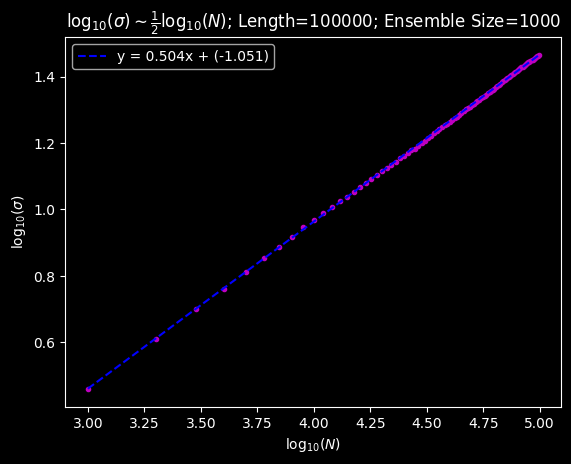

In [130]:
# Preparing data for plotting:
xs = np.log10(snapshots)
ys = np.log10(np.mean(sigmas, axis=0))
# Preparing a best fit line:
coefs = np.polynomial.polynomial.polyfit(xs, ys, deg=1)
ffit = np.polynomial.polynomial.polyval(xs, coefs)
# Initiating the plot:
fig, ax = plt.subplots()
ax.plot(xs, ffit, "b--", label=f"y = {coefs[1]:.3f}x + ({coefs[0]:.3f})", zorder=2)
ax.set_title(f"$\log_{{10}}(\sigma) \sim \\frac{{1}}{{2}}\log_{{10}}(N)$; Length={length}; Ensemble Size={ensemble_size}")
ax.set_xlabel("$\log_{{10}}(N)$")
ax.set_ylabel("$\log_{{10}}(\sigma)$")
ax.legend();
ax.errorbar(xs, ys,
            yerr=np.std(np.log10(sigmas), axis=0)/np.sqrt(ensemble_size-1),
            fmt=".",
            color="m",
            zorder=1);

In [132]:
# fig.savefig("Exercise6_2_6.jpg")

In [133]:
print(f"The slope is {coefs[1]} +- {np.mean(np.std(np.log10(sigmas), axis=0))}")

The slope is 0.5036040625978261 +- 0.10837311741867375
